In [8]:
import pandas as pd


In [9]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.preprocessing import StandardScaler

# Convert text columns to numeric
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].astype('category').cat.codes

# Select features
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed

# Fit the model and predict anomalies
df['anomaly'] = lof.fit_predict(X_scaled)


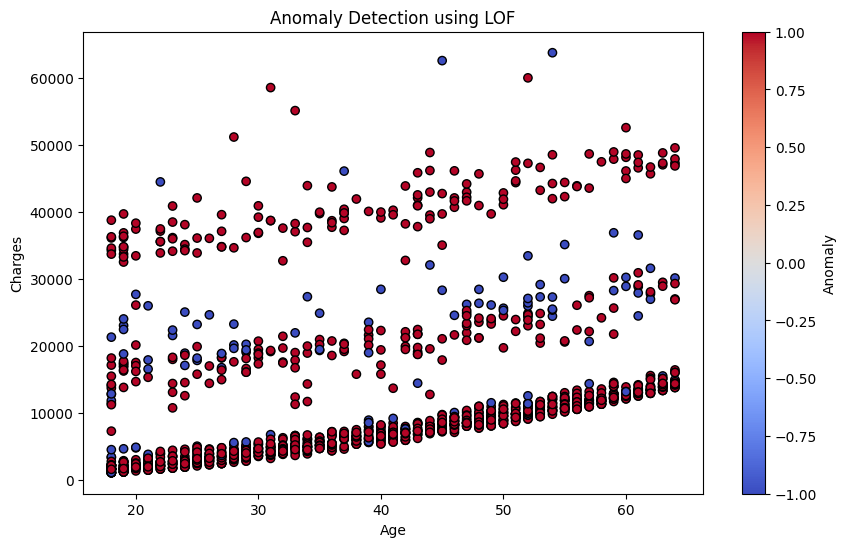

Anomalies detected:
      age  sex     bmi  children  smoker  region      charges  anomaly
3      33    1  22.705         0       0       1  21984.47061       -1
9      60    0  25.840         0       0       1  28923.13692       -1
28     23    1  17.385         1       0       1   2775.19215       -1
32     19    0  28.600         5       0       3   4687.79700       -1
46     18    0  38.665         2       0       0   3393.35635       -1
...   ...  ...     ...       ...     ...     ...          ...      ...
1300   45    1  30.360         0       1       2  62592.87309       -1
1317   18    1  53.130         0       0       2   1163.46270       -1
1318   35    1  39.710         4       0       0  19496.71917       -1
1328   23    0  24.225         2       0       0  22395.74424       -1
1332   52    0  44.700         3       0       3  11411.68500       -1

[134 rows x 8 columns]


In [6]:
import matplotlib.pyplot as plt

# Plot the results (for example, Age vs Charges)
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], c=df['anomaly'], cmap='coolwarm', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Anomaly Detection using LOF')
plt.colorbar(label='Anomaly')
plt.show()

# Optionally, display anomalies
anomalies = df[df['anomaly'] == -1]
print("Anomalies detected:")
print(anomalies)
